## **heart disease Pridiction**

### auther : [syed yashir raza zaidi](https://www.linkedin.com/in/syedyashir)

## date : 1-july-2024

## **About Dataset**
### **Context**
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Content**
#### **Column Descriptions:**
- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type 
  - typical angina
  - atypical angina 
  - non-anginal
  - asymptomatic
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
  -  normal
  -  stt abnormality
  -  lv hypertrophy
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute
## **Acknowledgements**
### ***Creators***
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### **Relevant Papers:**
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
### ***Citation Request:***
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.
***They would be:***
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

### **Aims And Objectives**

#### lets import libraries

we will impoort all thye libraries we will need in this project


In [3]:
# import libraries
#to handle data
import pandas as pd
import numpy as np
#to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to process the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
# import itreative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for mechine learning

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.ensemble import RandomForestClassifier
# for classificastion tasks
#metrixs
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#ignore warning
import warnings
warnings.filterwarnings("ignore")

### load the Dataset


In [4]:
# load dataset from pc
df = pd.read_csv("heart_disease_uci.csv")

# print first 5 rows

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### EXPLRORETORY DATA ANALYSIS



In [5]:
#exploring data typye of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
#data shape

df.shape

(920, 16)

## **Dealing with missing values**

#### lets make a function to deal with missing values

In [7]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [8]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
#now we check data types of missings values columns and distribute them accordingly

categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [11]:
# the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [12]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.203757225433524 

RMSE = 17.04676174899994 

R2 = 0.09267771067984831 

Missing Values chol : 3.26%
MAE = 45.472808988764044 

RMSE = 64.74490533078364 

R2 = 0.6679298442416453 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.22 accuracy

Missing Values thalch : 5.98%
MAE = 16.407456647398842 

RMSE = 21.213229717063403 

R2 = 0.3456608531007991 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 82.08 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5573720930232557 

RMSE = 0.7869171080131128 

R2 = 0.41004902908509966 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 77.01 accuracy



In [13]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

now as all values are imputed we can go further and deal with Outliers

## ***dealing with outliers***

In [14]:
df.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


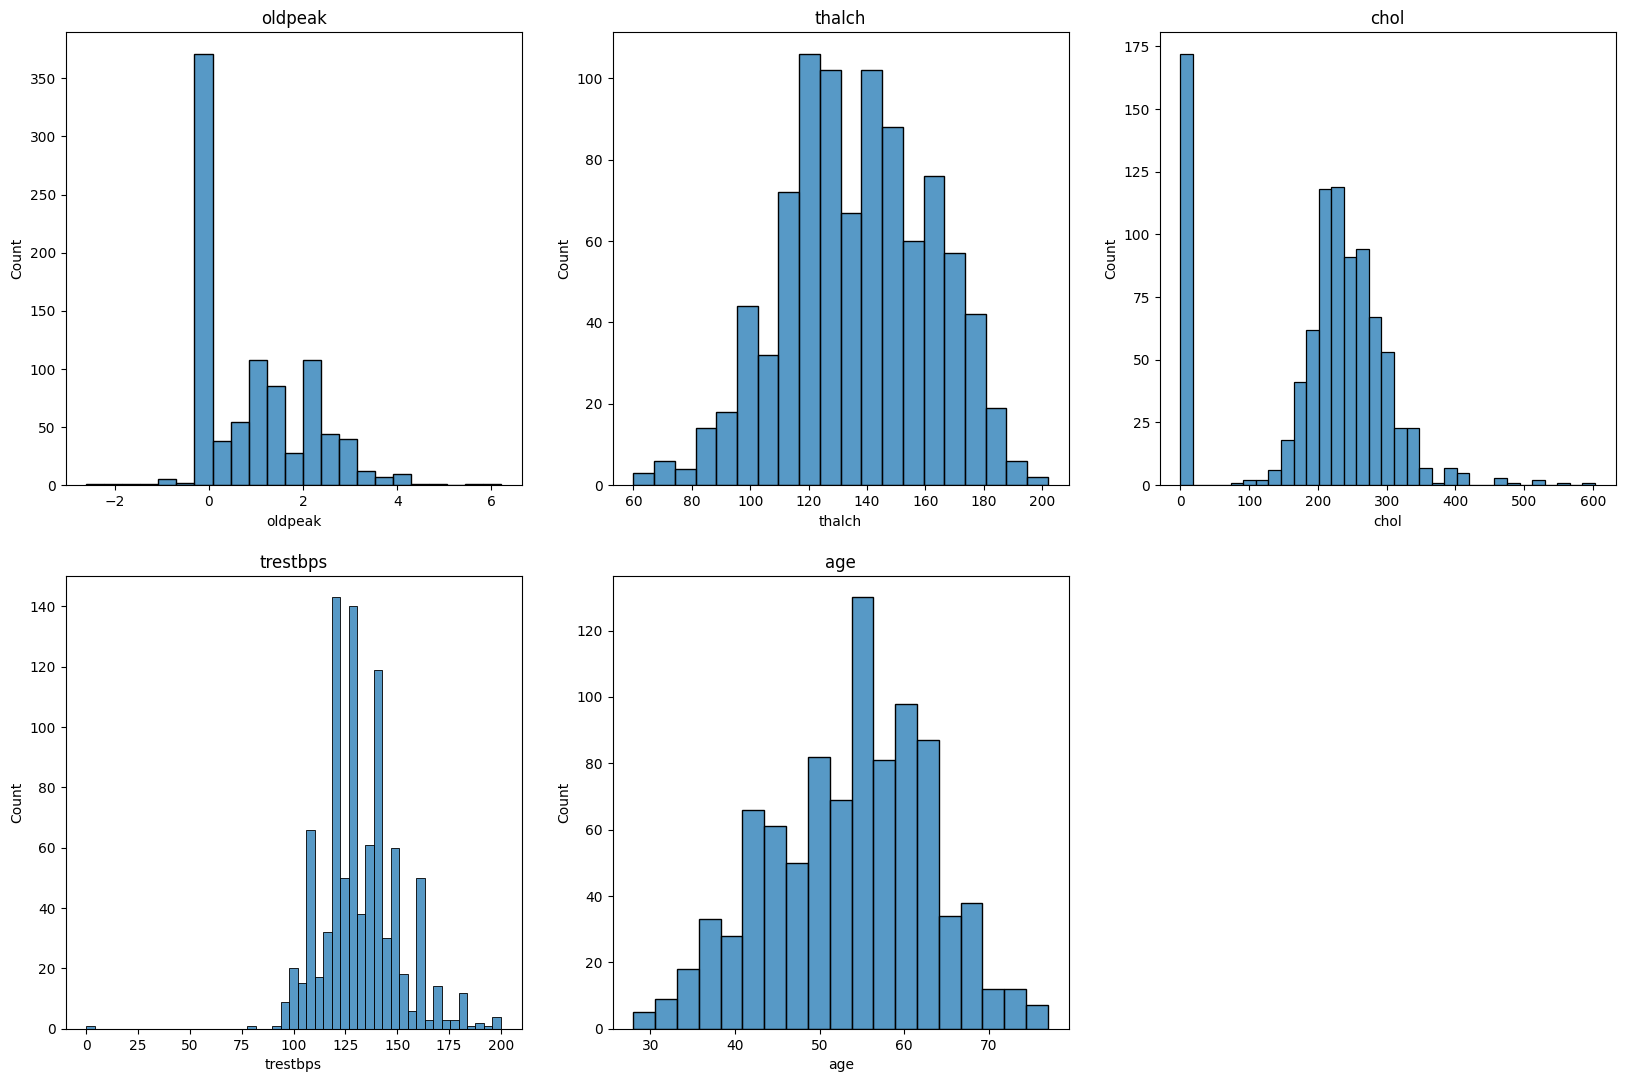

In [15]:
#create a histogram for all numeric values using loop and subplot
plt.figure(figsize=(20,20))

numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col],)
    plt.title(col)

plt.show()


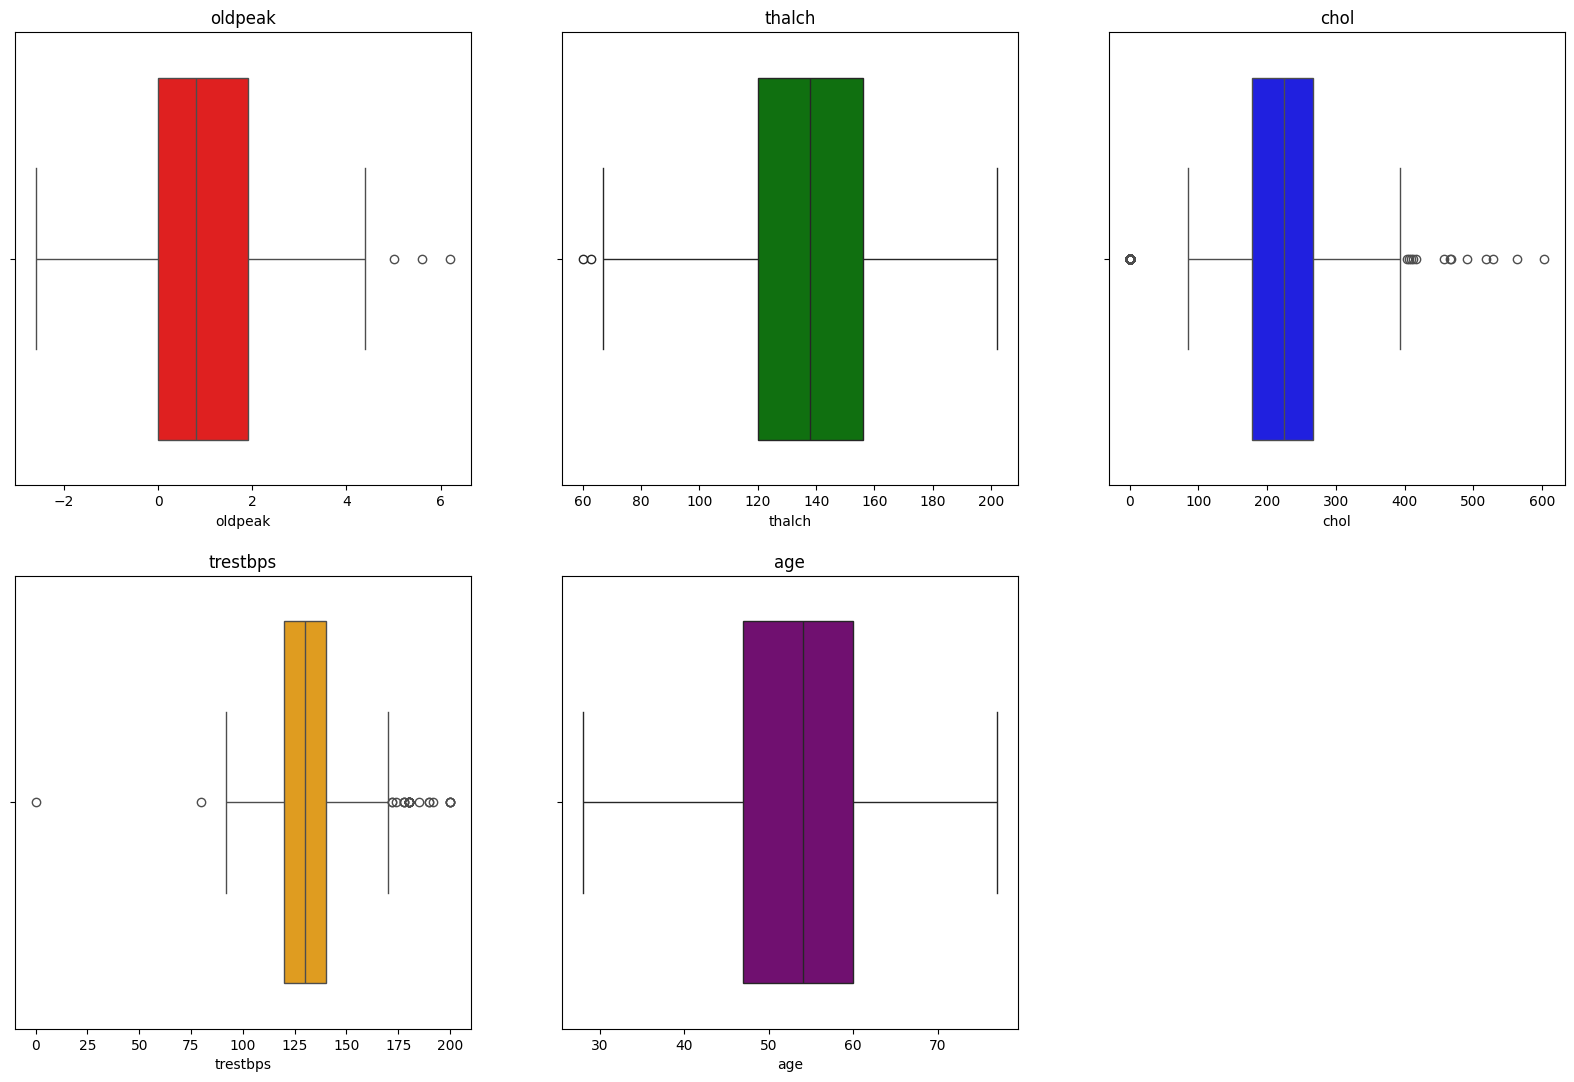

In [16]:
#create a boxplot for all numeric values using loop and subplot

plt.figure(figsize=(20,20))

numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
color = ["red",'green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col],color=color[i])
    plt.title(col)

plt.show()

In [17]:
#create a box using plotly
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

for i, col in enumerate(numeric_cols):
  fig = px.box(df,y=numeric_cols[i])
  fig.update_layout(height = 500,width = 500)
  fig.show()

In [18]:
#print row where trestbps value is 0

df[df["trestbps"] == 0]

#remove this row from data
df = df[df["trestbps"] != 0]


## ***explore each column***

In [19]:
#id column 

df["id"].min(),df["id"].max()


(1, 920)

#### lets explore age column

In [20]:
#summary of age column

df["age"].describe()

count    919.000000
mean      53.509249
std        9.429689
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [21]:
#age

df["age"].min(),df["age"].max()

(28, 77)

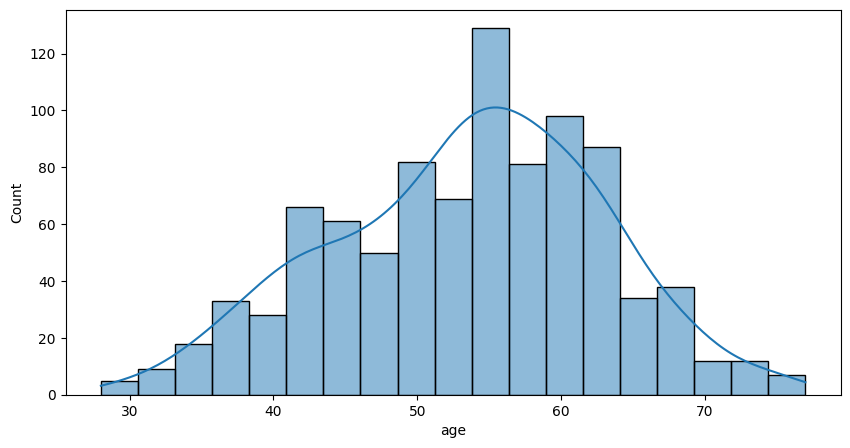

In [22]:
#draw histogram to see distribution of age column
plt.figure(figsize=(10,5))
sns.histplot(df["age"],kde = True)
plt.show()

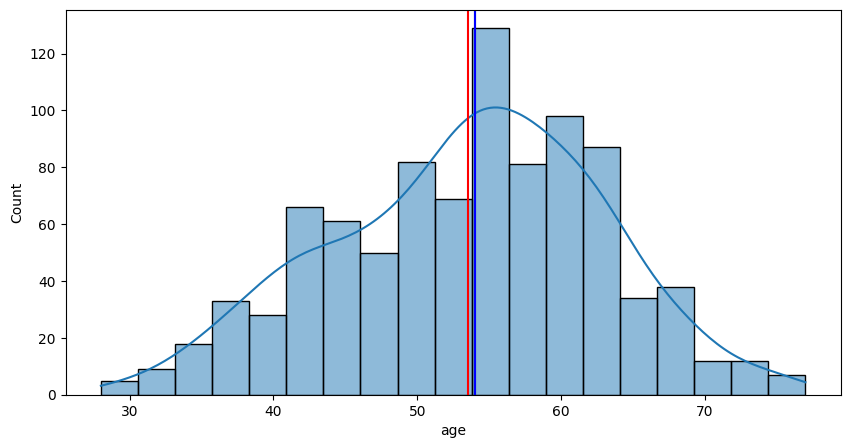

mean 53.50924918389554
median 54.0
mode 54


In [23]:
#plot the mean, median and mode of age column using sns histogram

plt.figure(figsize=(10,5))
sns.histplot(df["age"],kde = True)
plt.axvline(df["age"].mean(),color="red")
plt.axvline(df["age"].median(),color="green")
plt.axvline(df["age"].mode()[0],color="blue")
plt.show()

# print mean,median ,mode
print("mean",df["age"].mean())
print("median",df["age"].median())
print("mode",df["age"].mode()[0])

In [24]:
#create a histogram of age column and color it by sex column using plotly

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="sex")
fig.show()



<Figure size 800x500 with 0 Axes>

In [25]:
#find the values of sex comluun

df["sex"].value_counts()

sex
Male      725
Female    194
Name: count, dtype: int64

In [26]:
male_count = 726
female_count = 194
total_count = male_count+female_count

male_percentage = (male_count/total_count)*100
female_percentage = (female_count/total_count)*100

diffrence_percentange = ((male_count-female_count)/female_count)*100

print(f"males are : {diffrence_percentange:.2f} % more then females")


males are : 274.23 % more then females


In [27]:
#ratio of male and female in sex column

df["sex"].value_counts()*100/df.shape[0]

sex
Male      78.890098
Female    21.109902
Name: count, dtype: float64

Text(0.5, 1.0, 'sex column')

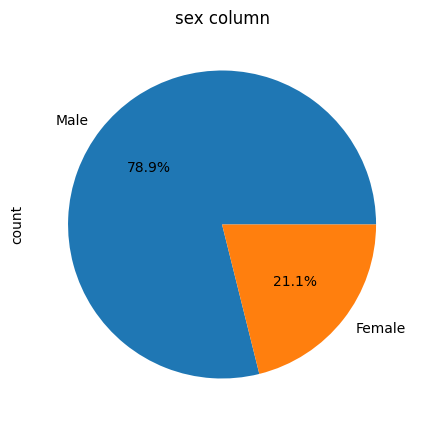

In [28]:

plt.figure(figsize=(8,5))
fig = df["sex"].value_counts().plot.pie(autopct="%1.1f%%",subplots=True)
plt.title("sex column")

In [29]:
#find out value count of age column by grouping by sex column
df.groupby("sex")["age"].value_counts()




sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [30]:
#lets deal with dataset column

df["dataset"].unique()


array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [31]:
#uniqe values count in dataset column

df["dataset"].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    199
Switzerland      123
Name: count, dtype: int64

Text(0.5, 1.0, 'countries dataset collected from')

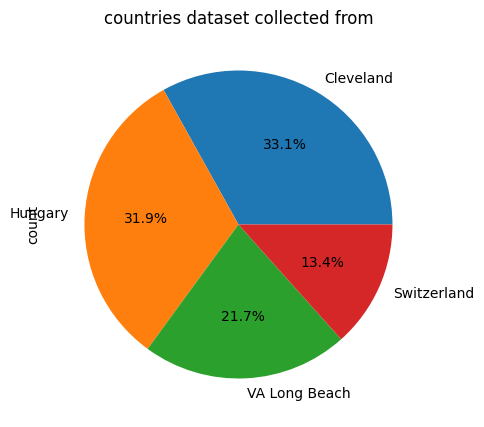

In [32]:

plt.figure(figsize=(8,5))
fig = df["dataset"].value_counts().plot.pie(autopct="%1.1f%%",subplots=True)
plt.title("countries dataset collected from")

In [33]:
# Create the map visualization
fig = px.choropleth(df,locations='dataset', locationmode='country names', color = "trestbps",
                    title='Total Cases by Country', range_color=[0, 200])
# Display the map
fig.show()

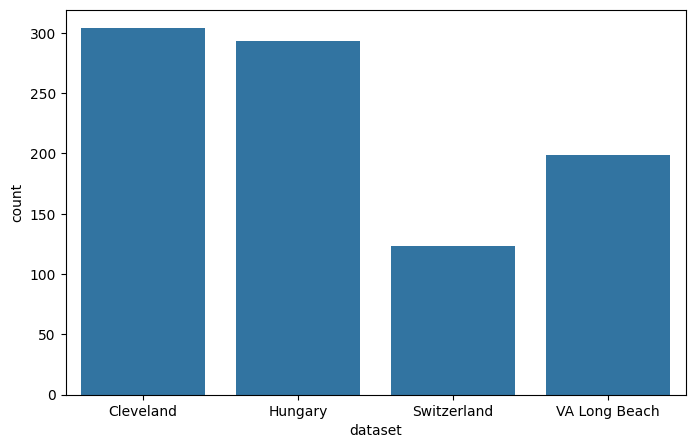

In [34]:
#create a countplot of dataset column
plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="dataset")


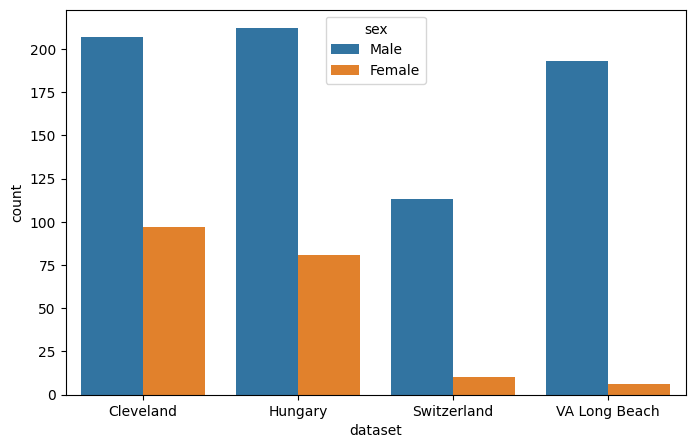

<Figure size 800x500 with 0 Axes>

In [35]:
#create a countplot of dataset column and color it by sex column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="dataset",hue="sex")


plt.figure(figsize=(8,5))
fig = px.bar(df,x="dataset",color="sex")
fig.show()



In [36]:
#print value of dataset column gruoped by sex

df.groupby("sex")["dataset"].value_counts()



sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    193
        Switzerland      113
Name: count, dtype: int64

In [37]:
#make a age culnm by plotly and colour it by dataset column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="dataset")
fig.show()

# print the mean, median and mode of age column grouped by dataset columnv
print("mean of dataset :",df.groupby("dataset")["age"].mean())
print('-----------------------------------------------')
print("median of dataset :",df.groupby("dataset")["age"].median())
print('-----------------------------------------------')
print("mode of dataset :",df.groupby("dataset")["age"].agg(pd.Series.mode))

mean of dataset : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.371859
Name: age, dtype: float64
-----------------------------------------------
median of dataset : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------------------------
mode of dataset : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


<Figure size 800x500 with 0 Axes>

#### lets explore cp(chest pain) column

In [38]:
#lets explore cp columnb

df["cp"].unique()





array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [39]:
#uniqe value counts

df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        203
atypical angina    174
typical angina      46
Name: count, dtype: int64

Text(0.5, 1.0, 'chest pain types')

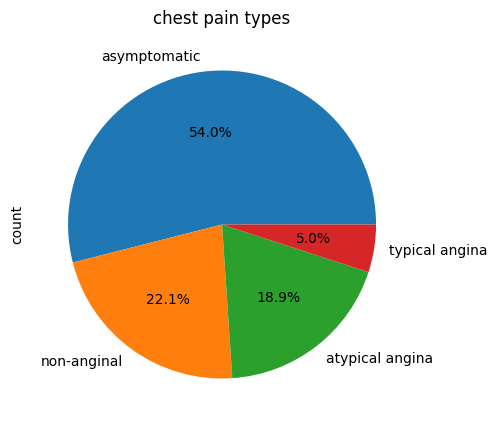

In [40]:

plt.figure(figsize=(8,5))
fig = df["cp"].value_counts().plot.pie(autopct="%1.1f%%",subplots=True)
plt.title("chest pain types")

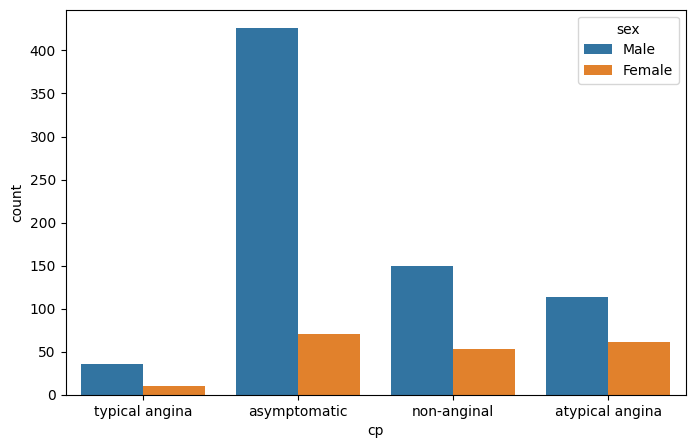

In [41]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="cp",hue="sex")

In [42]:
df.groupby("cp")["sex"].value_counts()

cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      150
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64

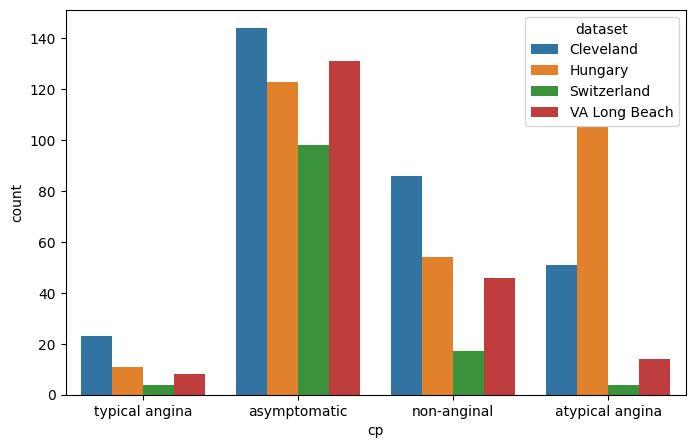

In [43]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="cp",hue="dataset")

In [44]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="cp")
fig.show()

<Figure size 800x500 with 0 Axes>

In [45]:
df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        203
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [46]:
#draw an plot of age column grouped by cp column
# a typical (56) 52-57
# non anginal (70) 50-59
# a symptomatic (256) 54-63
# typical angina (10) 62-65
plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="cp")
fig.show()

<Figure size 800x500 with 0 Axes>

In [47]:
# oberservation from upper graph 

# a typical (56) 52-57
# non anginal (70) 50-59
# a symptomatic (256) 54-63
# typical angina (10) 62-65

print('a symptomatic',(256/ 496)*100)
print('non angina',(70/203)*100)
print('a typical',(56/174)*100)
print('typical angina',(10/46)*100)

a symptomatic 51.61290322580645
non angina 34.48275862068966
a typical 32.18390804597701
typical angina 21.73913043478261


In [48]:
#make a cp culnm by plotly and colour it by dataset column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="cp",color="dataset")
fig.show()


<Figure size 800x500 with 0 Axes>

In [49]:

df.groupby("cp")["dataset"].value_counts()

cp               dataset      
asymptomatic     Cleveland        144
                 VA Long Beach    131
                 Hungary          123
                 Switzerland       98
atypical angina  Hungary          105
                 Cleveland         51
                 VA Long Beach     14
                 Switzerland        4
non-anginal      Cleveland         86
                 Hungary           54
                 VA Long Beach     46
                 Switzerland       17
typical angina   Cleveland         23
                 Hungary           11
                 VA Long Beach      8
                 Switzerland        4
Name: count, dtype: int64

#### lets explore trestbps (resting blood pressure (in mm Hg on admission to the hospital))
the normal resting blood pressure is 120/80 mm Hg
'write down here what will happen if the blood pressure is high or low and then bin the data based on those values.'

In [50]:
#valuecount of tresrtbps column

df["trestbps"].describe()

count    919.000000
mean     132.536366
std       18.003409
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [51]:
# lets explore trestbps column

df["trestbps"].unique()

array([145.  , 160.  , 120.  , 130.  , 140.  , 172.  , 150.  , 110.  ,
       132.  , 117.  , 135.  , 112.  , 105.  , 124.  , 125.  , 142.  ,
       128.  , 170.  , 155.  , 104.  , 180.  , 138.  , 108.  , 134.  ,
       122.  , 115.  , 118.  , 100.  , 200.  ,  94.  , 165.  , 102.  ,
       152.  , 101.  , 126.  , 174.  , 148.  , 178.  , 158.  , 192.  ,
       129.  , 144.  , 123.  , 136.  , 146.  , 106.  , 156.  , 154.  ,
       114.  , 164.  ,  98.  , 190.  , 135.47, 113.  ,  92.  ,  95.  ,
       127.22,  80.  , 185.  , 139.85, 139.28, 116.  , 137.15, 133.55,
       129.89, 132.79, 132.51, 137.13, 135.07, 145.31, 128.26, 141.72,
       138.2 , 137.07, 132.94, 137.06, 139.29, 134.03, 136.74, 133.69,
       133.97, 133.9 , 131.52,  96.  , 126.07, 127.98, 129.25, 130.81,
       133.45, 130.69, 135.49, 136.72, 139.69, 131.69, 135.48, 138.64,
       134.22, 141.78, 143.54, 133.46, 134.41, 137.37, 136.45, 128.7 ,
       140.58, 139.2 , 144.32, 148.34, 144.31, 146.89, 132.32, 136.33,
      

In [52]:


plt.figure(figsize=(8,5))
fig = px.histogram(df,x="trestbps",color = "sex")
fig.show()

<Figure size 800x500 with 0 Axes>

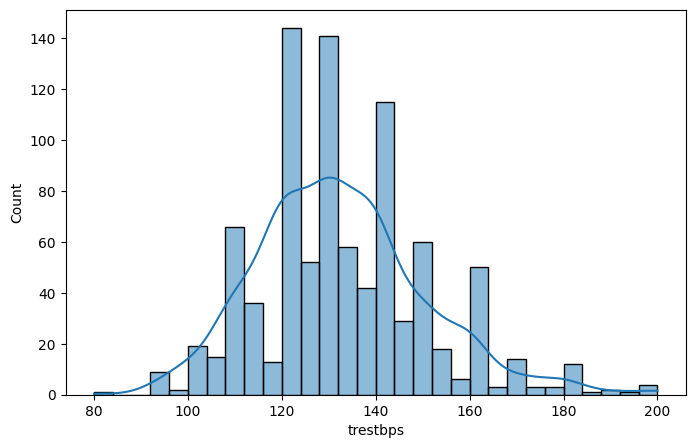

In [53]:
#create a histplot of trestbps column

plt.figure(figsize=(8,5))
fig = sns.histplot(df,x="trestbps",kde = True)



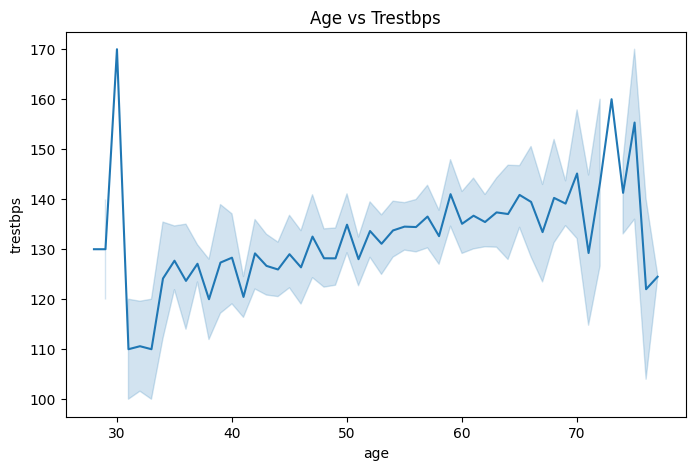

In [54]:
#line chart of age and trestbps column

plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="age",y="trestbps")
plt.title("Age vs Trestbps")
plt.show()


In [55]:
fig = px.scatter(df, x='chol', y='trestbps', title='Serum Cholesterol vs. Resting Blood Pressure')
fig.show()

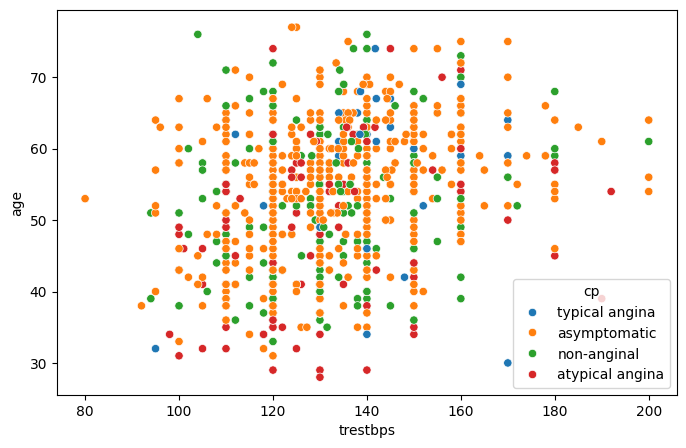

In [56]:
# make a scater plot of trestbps and age and colour it with sex column

plt.figure(figsize=(8,5))
fig = sns.scatterplot(data = df,x="trestbps",y="age",hue="cp")


###  lets explorore chol (serum cholesterol in mg/dl) column

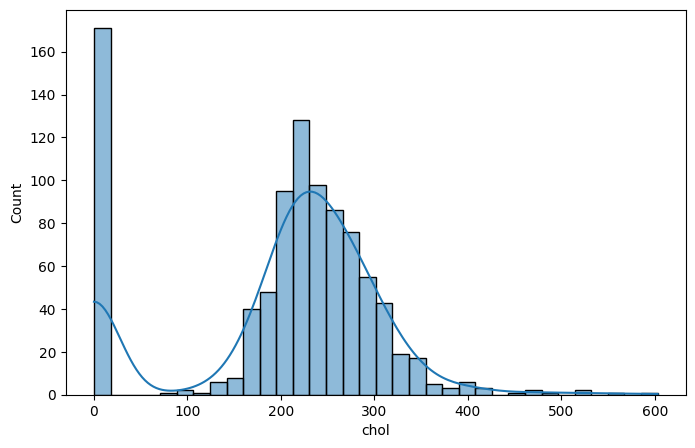

In [57]:
# chol column uniqe values

#create a histplot of trestbps column

plt.figure(figsize=(8,5))
fig = sns.histplot(df,x="chol",kde = True)

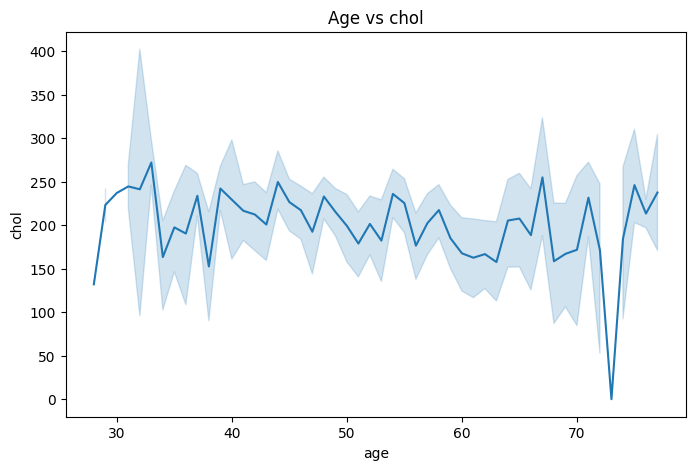

In [58]:

plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="age",y="chol")
plt.title("Age vs chol")
plt.show()


In [59]:
# plot histogram age values when chol = 0

df[df["chol"] == 0]["age"].unique()



array([32, 34, 35, 36, 38, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       72, 73, 74, 49], dtype=int64)

In [60]:
# number of values in chol column


#df["chol"].value_counts().sum()
##chol value count for sex column
df[df["sex"] == "Female"]["chol"].value_counts().sum()
#df[df["sex"] == "Male"]["chol"].value_counts().sum()


194

In [61]:
print((438/919)*100,'% of pataints have chol level 190-260')
print((171/919)*100,'% of pataints have chol level less then 40')

print((406/725)*100,'% of male pataints have chol level 190-290')
print((160/725)*100,'% of male pataints have chol level less then 40')

print((102/194)*100,'% of female pataints have chol level 190-270')
print((11/194)*100,'% of female pataints have chol level less then 40')

47.66050054406964 % of pataints have chol level 190-260
18.607181719260065 % of pataints have chol level less then 40
56.00000000000001 % of male pataints have chol level 190-290
22.06896551724138 % of male pataints have chol level less then 40
52.57731958762887 % of female pataints have chol level 190-270
5.670103092783505 % of female pataints have chol level less then 40


In [62]:
#chol column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="chol",color="sex")
fig.show()
#
#438 190-260 total 919
#171  > 40   total 919

# 406 190-290 total 725
#160  > 40   total 725

# 102 190-270 total 194
#11  > 40   total 194

<Figure size 800x500 with 0 Axes>

In [63]:
#chol column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="chol",color="sex")
fig.show()
#
#438 190-260 total 919
#171  > 40   total 919

# 406 190-290 total 725
#160  > 40   total 725

# 102 190-270 total 194
#11  > 40   total 194

<Figure size 800x500 with 0 Axes>

#### fbs column (if fasting blood sugar > 120 mg/dl)

Text(0.5, 1.0, 'fbs column')

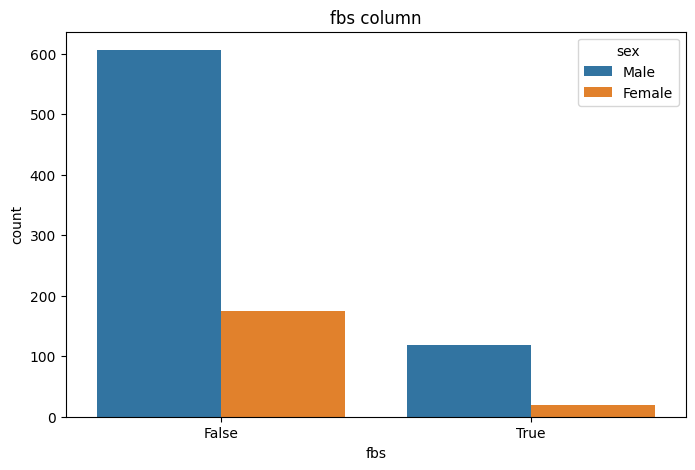

In [64]:
#make an countplot for fbs column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="fbs",hue="sex")
plt.title("fbs column")

Text(0.5, 1.0, 'fasting blood sugar > 120 mg/dl')

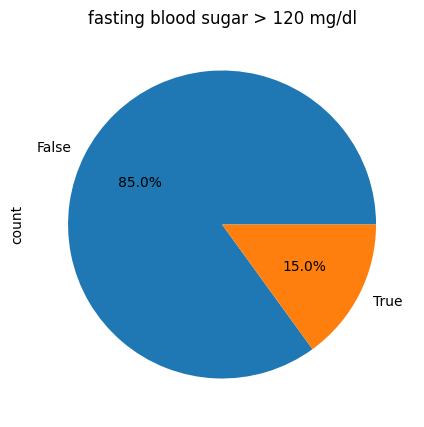

In [65]:
#make an piechart for fbs column

plt.figure(figsize=(8,5))
fig = df["fbs"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("fasting blood sugar > 120 mg/dl")



Text(0.5, 1.0, 'ratio of males when fbs < 120 mg/dl 120')

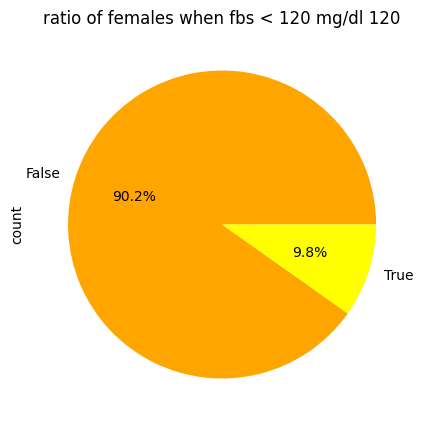

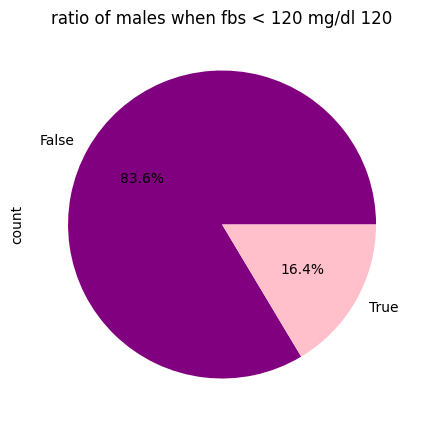

In [66]:
#make 2 piechart of fbs culumn "True" feature with sex column

plt.figure(figsize=(8,5))
fig = df[df["sex"] == "Female"]["fbs"].value_counts().plot.pie(autopct="%1.1f%%",colors=["orange","yellow"])
plt.title("ratio of females when fbs < 120 mg/dl 120")


plt.figure(figsize=(8,5))
fig = df[df["sex"] == "Male"]["fbs"].value_counts().plot.pie(autopct="%1.1f%%",colors=["purple","pink"])
plt.title("ratio of males when fbs < 120 mg/dl 120")


Text(0.5, 1.0, 'cp and fbs')

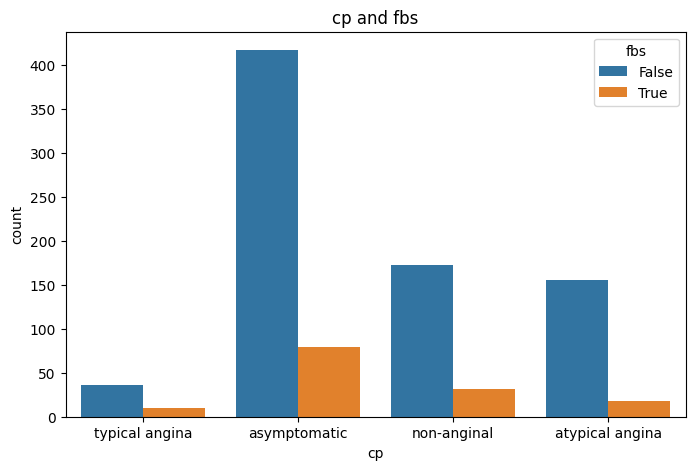

In [67]:
#make a chart of cp and fbs

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="cp",hue="fbs")
plt.title("cp and fbs")

#### restecg column (resting electrocardiographic results)


In [68]:
# uniqe values of restecg column

df["restecg"].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [69]:
df["restecg"].value_counts()

restecg
normal              551
lv hypertrophy      189
st-t abnormality    179
Name: count, dtype: int64

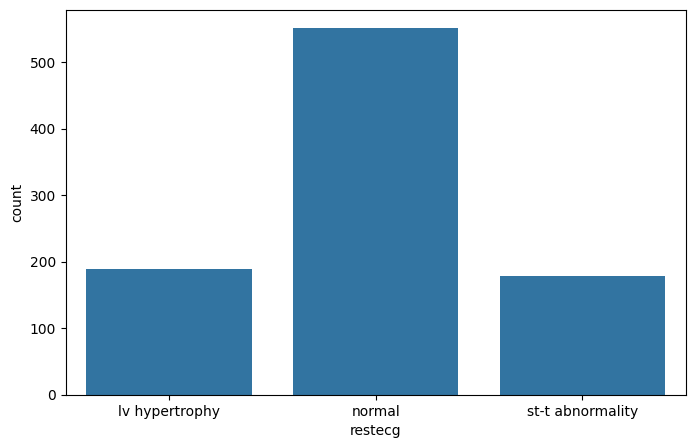

In [70]:
#create a countplot of dataset column from plotly
plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="restecg")


Text(0.5, 1.0, 'restecg types')

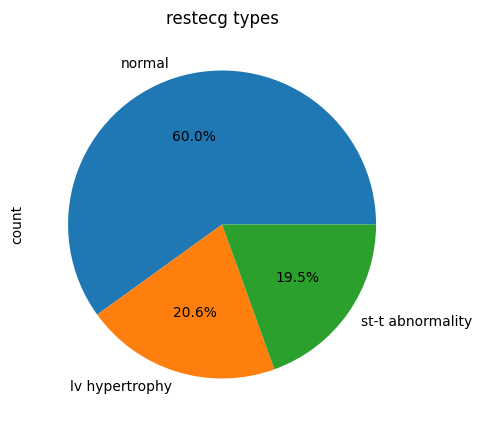

In [71]:
#make an piechart for fbs column

plt.figure(figsize=(8,5))
fig = df["restecg"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("restecg types")



Text(0.5, 1.0, 'restecg and sex')

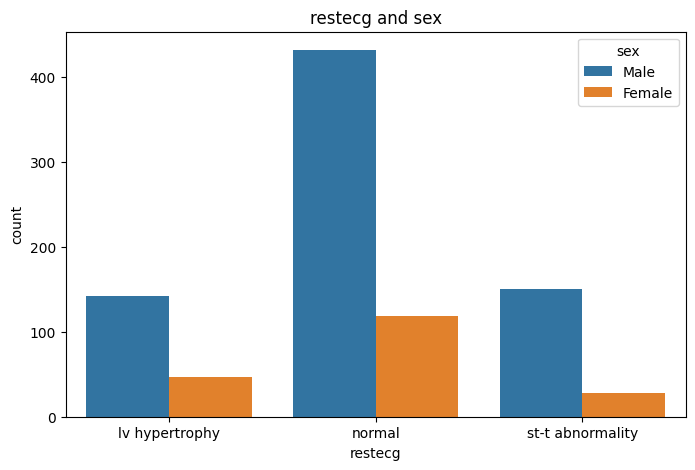

In [72]:
# make restecg and sex column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="restecg",hue="sex")
plt.title("restecg and sex")

In [73]:
df.groupby("restecg")["sex"].value_counts()

restecg           sex   
lv hypertrophy    Male      142
                  Female     47
normal            Male      432
                  Female    119
st-t abnormality  Male      151
                  Female     28
Name: count, dtype: int64

In [74]:
df.head(1)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0


In [75]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="restecg")
fig.show()

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'distribution grouped by dataset and restecg')

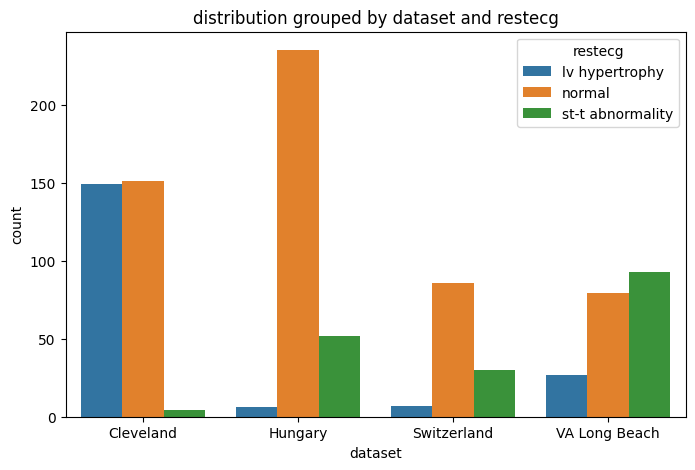

In [76]:
#draw an plot of age column grouped by cp restecg

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="dataset",hue="restecg")
plt.title("distribution grouped by dataset and restecg")


In [77]:
df.groupby("restecg")["dataset"].value_counts()

restecg           dataset      
lv hypertrophy    Cleveland        149
                  VA Long Beach     27
                  Switzerland        7
                  Hungary            6
normal            Hungary          235
                  Cleveland        151
                  Switzerland       86
                  VA Long Beach     79
st-t abnormality  VA Long Beach     93
                  Hungary           52
                  Switzerland       30
                  Cleveland          4
Name: count, dtype: int64

In [78]:
df.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


#### dealing with thalch column (maximum heart rate achieved)

In [79]:
#thalch uniqe values
df["thalch"].unique()

array([150.  , 108.  , 129.  , 187.  , 172.  , 178.  , 160.  , 163.  ,
       147.  , 155.  , 148.  , 153.  , 142.  , 173.  , 162.  , 174.  ,
       168.  , 139.  , 171.  , 144.  , 132.  , 158.  , 114.  , 151.  ,
       161.  , 179.  , 120.  , 112.  , 137.  , 157.  , 169.  , 165.  ,
       123.  , 128.  , 152.  , 140.  , 188.  , 109.  , 125.  , 131.  ,
       170.  , 113.  ,  99.  , 177.  , 141.  , 180.  , 111.  , 143.  ,
       182.  , 156.  , 115.  , 149.  , 145.  , 146.  , 175.  , 186.  ,
       185.  , 159.  , 130.  , 190.  , 136.  ,  97.  , 127.  , 154.  ,
       133.  , 126.  , 202.  , 103.  , 166.  , 164.  , 184.  , 124.  ,
       122.  ,  96.  , 138.  ,  88.  , 105.  , 194.  , 195.  , 106.  ,
       167.  ,  95.  , 192.  , 117.  , 121.  , 116.  ,  71.  , 118.  ,
       181.  , 134.  ,  90.  ,  98.  , 176.  , 135.  , 110.  , 138.48,
       100.  ,  87.  , 102.  ,  92.  ,  91.  ,  82.  , 119.  ,  94.  ,
       104.  ,  60.  ,  83.  ,  63.  ,  70.  ,  77.  ,  72.  ,  78.  ,
      

In [80]:
#no of rows
len(df["thalch"].unique())

174

In [81]:
(461/919)*100

50.16322089227421

In [82]:
# histogram of thalch
plt.figure(figsize=(8,5))
fig = px.histogram(df,x="thalch",color= 'dataset')
fig.show()    # 117-153 (461) 50.1%

<Figure size 800x500 with 0 Axes>

In [83]:
#take mean of talch column with datasetb column

df.groupby("dataset")["thalch"].mean()


dataset
Cleveland        149.723684
Hungary          138.970922
Switzerland      121.565935
VA Long Beach    123.202814
Name: thalch, dtype: float64

In [84]:
#take mean of talch column with datasetb column

df.groupby("sex")["thalch"].mean()

sex
Female    146.110619
Male      134.288262
Name: thalch, dtype: float64

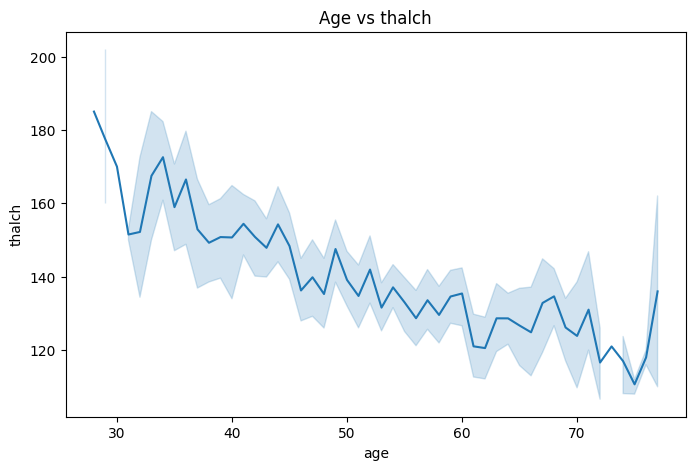

In [85]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="age",y="thalch")
plt.title("Age vs thalch")
plt.show()

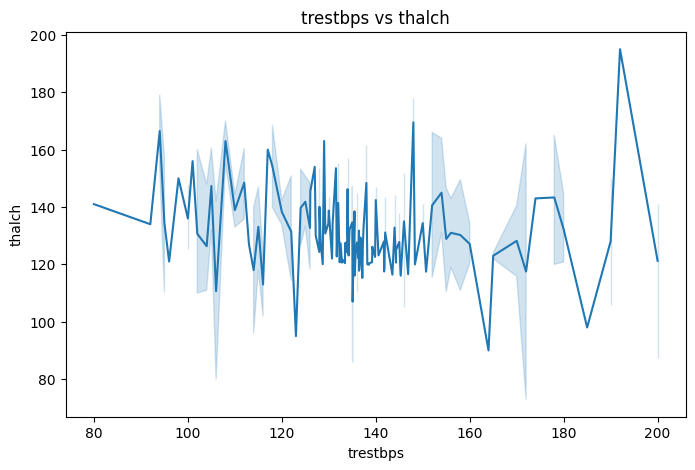

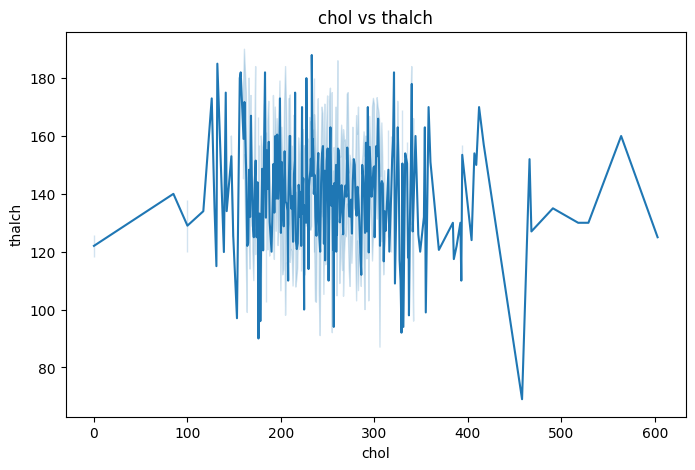

In [86]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="trestbps",y="thalch")
plt.title("trestbps vs thalch")
plt.show()
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="chol",y="thalch")
plt.title("chol vs thalch")
plt.show()

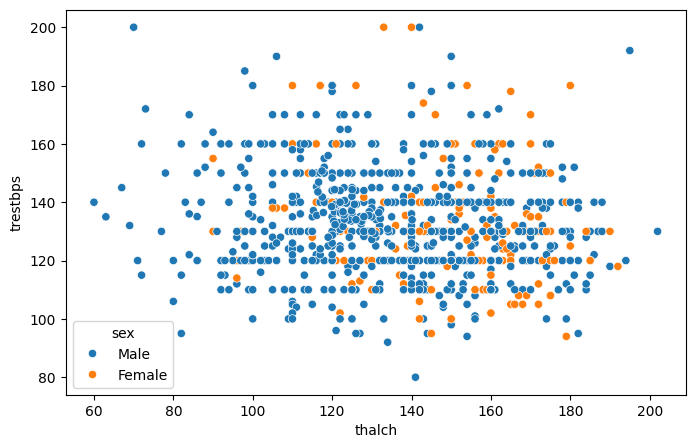

In [87]:
# make a scater plot of trestbps and age and colour it with sex column

plt.figure(figsize=(8,5))
fig = sns.scatterplot(data = df,x="thalch",y="trestbps",hue="sex")

#### exang column (exercise-induced angina (True/ False))

In [88]:
## exang  no of uniqe values

df["exang"].value_counts()

exang
False    538
True     381
Name: count, dtype: int64

Text(0.5, 1.0, 'exang column')

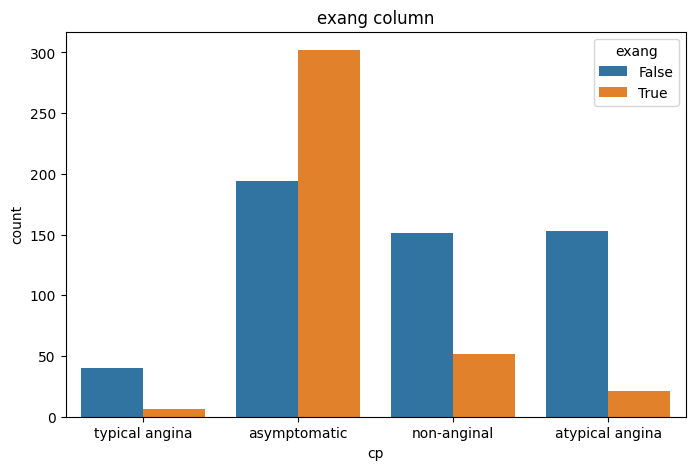

In [89]:
#make an countplot for fbs column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="cp",hue="exang")
plt.title("exang column")

Text(0.5, 1.0, 'exang column')

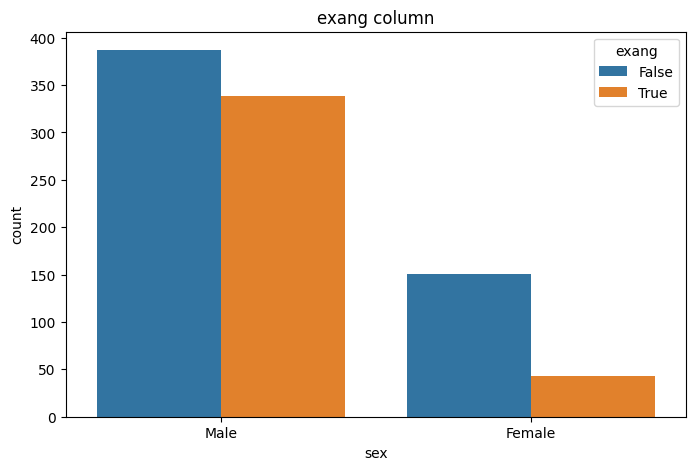

In [90]:
plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="sex",hue="exang")
plt.title("exang column")

Text(0.5, 1.0, 'ratio of males when fbs < 120 mg/dl 120')

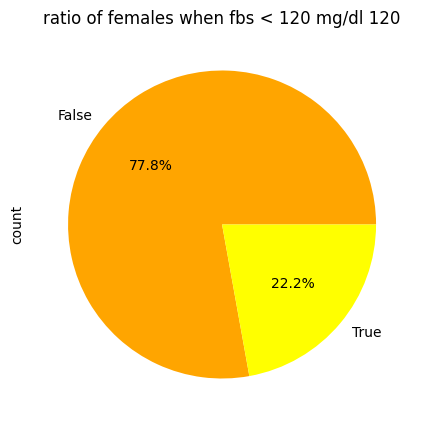

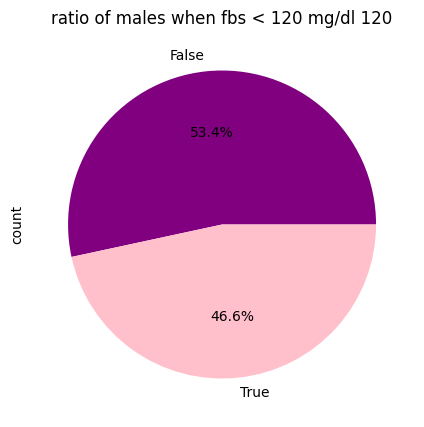

In [91]:

plt.figure(figsize=(8,5))
fig = df[df["sex"] == "Female"]["exang"].value_counts().plot.pie(autopct="%1.1f%%",colors=["orange","yellow"])
plt.title("ratio of females when fbs < 120 mg/dl 120")


plt.figure(figsize=(8,5))
fig = df[df["sex"] == "Male"]["exang"].value_counts().plot.pie(autopct="%1.1f%%",colors=["purple","pink"])
plt.title("ratio of males when fbs < 120 mg/dl 120")

Text(0.5, 1.0, 'exang column')

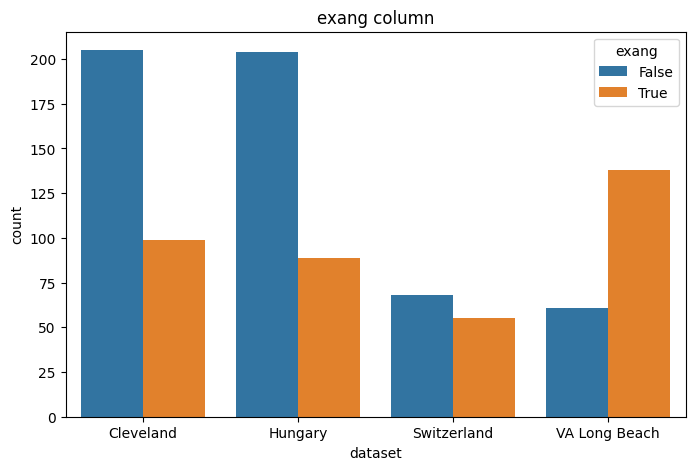

In [92]:
plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="dataset",hue="exang")
plt.title("exang column")

In [93]:
# histogram of thalch
plt.figure(figsize=(8,5))
fig = px.histogram(df,x="thalch",color= 'exang')
fig.show()
#mean

<Figure size 800x500 with 0 Axes>

In [94]:
fig = px.box(df, x='exang', y='thalch', title='Maximum Heart Rate by Exercise-Induced Angina')
fig.show()

In [95]:
df.groupby("exang")["thalch"].mean()

exang
False    144.580706
True     125.774357
Name: thalch, dtype: float64

Text(0.5, 1.0, 'exang')

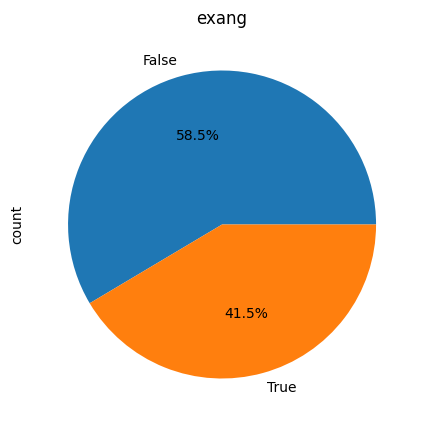

In [96]:
#make an piechart 

plt.figure(figsize=(8,5))
fig = df["exang"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("exang")



#### oldpeak column (ST depression induced by exercise relative to rest)

In [97]:
#oldpeak value count

df["oldpeak"].value_counts()

oldpeak
0.000    370
1.000     83
2.000     76
1.500     47
3.000     28
        ... 
2.102      1
2.577      1
2.158      1
2.699      1
2.373      1
Name: count, Length: 114, dtype: int64

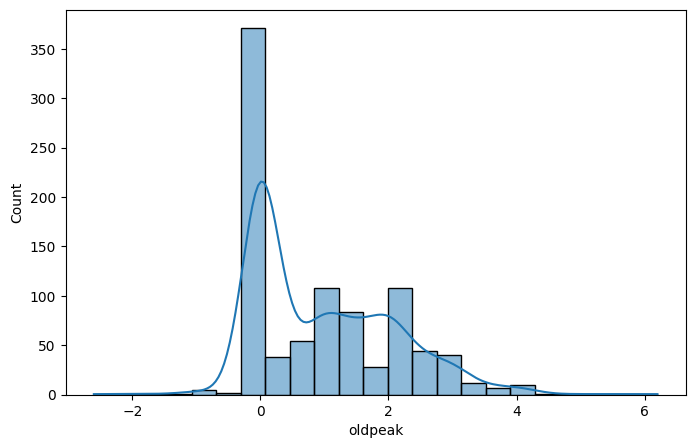

In [98]:
#oldpeak histogram

plt.figure(figsize=(8,5))
fig = sns.histplot(df,x="oldpeak",kde = True)

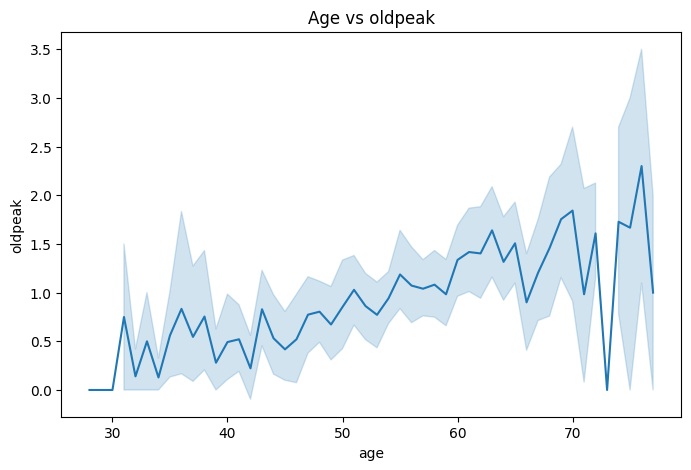

In [99]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="age",y="oldpeak")
plt.title("Age vs oldpeak")
plt.show()

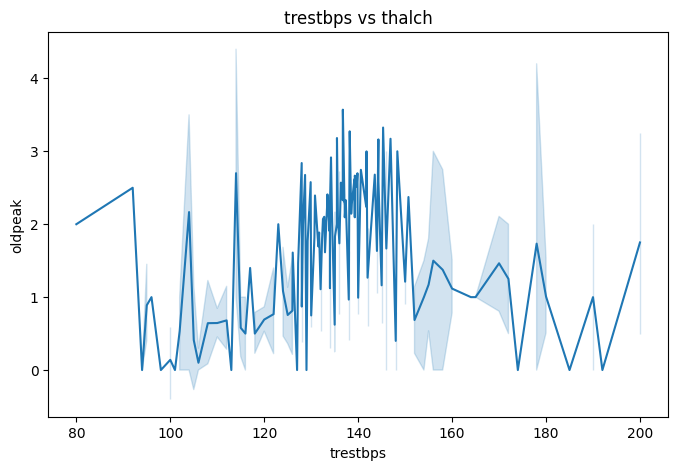

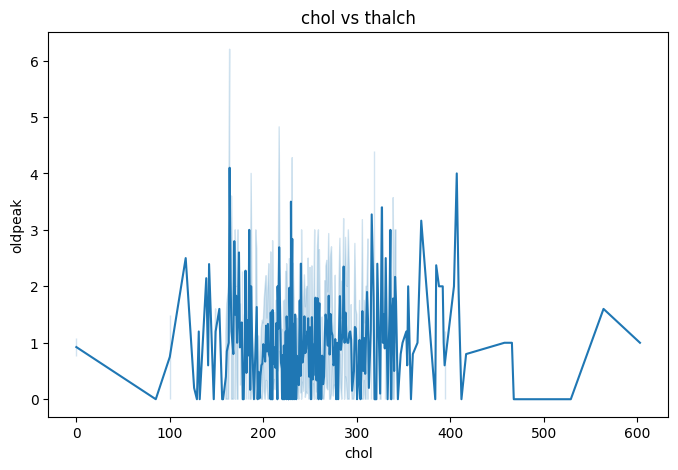

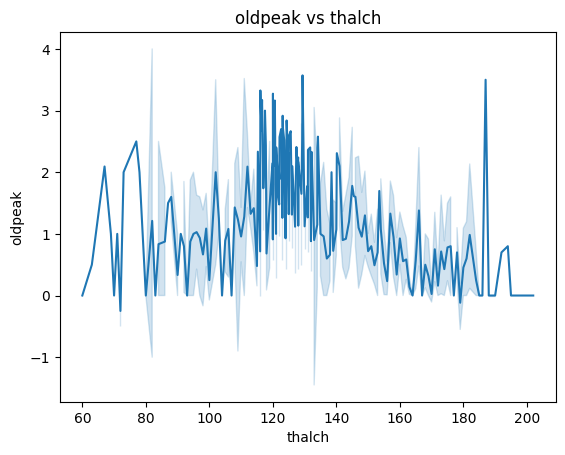

In [100]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="trestbps",y="oldpeak")
plt.title("trestbps vs thalch")
plt.show()
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="chol",y="oldpeak")
plt.title("chol vs thalch")
plt.show()

fig = sns.lineplot(data = df,x="thalch",y="oldpeak")
plt.title("oldpeak vs thalch")
plt.show()

In [101]:
df.groupby("dataset")["oldpeak"].mean()

dataset
Cleveland        1.036184
Hungary          0.588055
Switzerland      0.709797
VA Long Beach    1.615085
Name: oldpeak, dtype: float64

#### slope column

In [102]:
#slope uniqe values

df["slope"].value_counts()

slope
flat           529
upsloping      306
downsloping     84
Name: count, dtype: int64

Text(0.5, 1.0, 'restecg and sex')

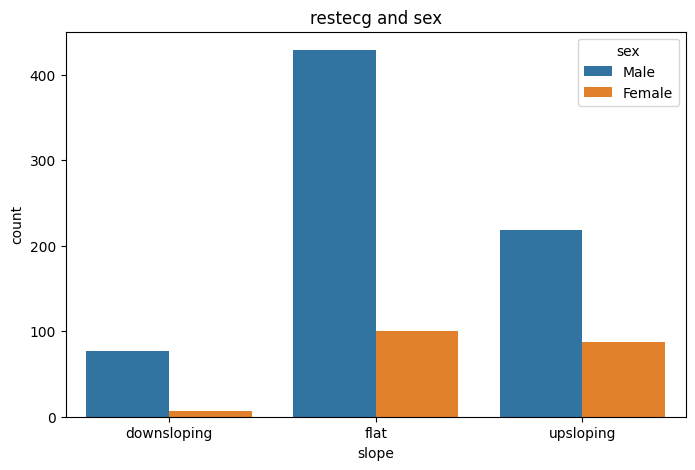

In [103]:
# make restecg and sex column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="slope",hue="sex")
plt.title("restecg and sex")

In [104]:
df.groupby("slope")["sex"].value_counts()

slope        sex   
downsloping  Male       77
             Female      7
flat         Male      429
             Female    100
upsloping    Male      219
             Female     87
Name: count, dtype: int64

In [105]:
df.groupby("dataset")["slope"].value_counts()

dataset        slope      
Cleveland      upsloping      143
               flat           140
               downsloping     21
Hungary        flat           178
               upsloping      114
               downsloping      1
Switzerland    flat            78
               upsloping       33
               downsloping     12
VA Long Beach  flat           133
               downsloping     50
               upsloping       16
Name: count, dtype: int64

Text(0.5, 1.0, 'restecg and sex')

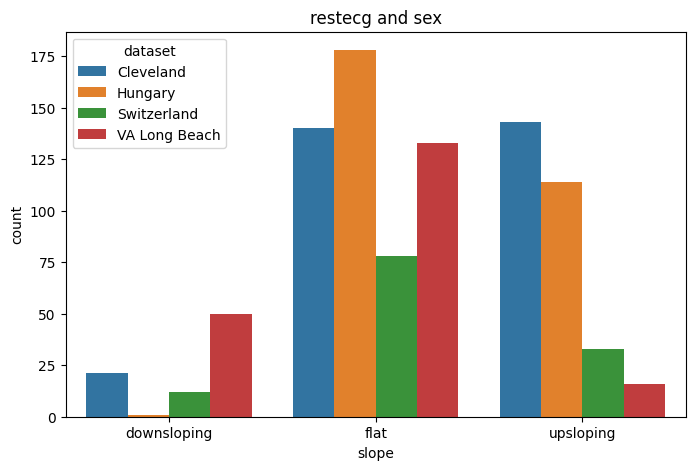

In [106]:
# make restecg and sex column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="slope",hue="dataset")
plt.title("restecg and sex")

In [107]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="slope")
fig.show()

<Figure size 800x500 with 0 Axes>

In [108]:
df.groupby("slope")["dataset"].value_counts()

slope        dataset      
downsloping  VA Long Beach     50
             Cleveland         21
             Switzerland       12
             Hungary            1
flat         Hungary          178
             Cleveland        140
             VA Long Beach    133
             Switzerland       78
upsloping    Cleveland        143
             Hungary          114
             Switzerland       33
             VA Long Beach     16
Name: count, dtype: int64

#### ca column

In [109]:
# ca value count

df["ca"].value_counts()

ca
0.0    629
1.0    169
2.0    101
3.0     20
Name: count, dtype: int64

Text(0.5, 1.0, 'ca')

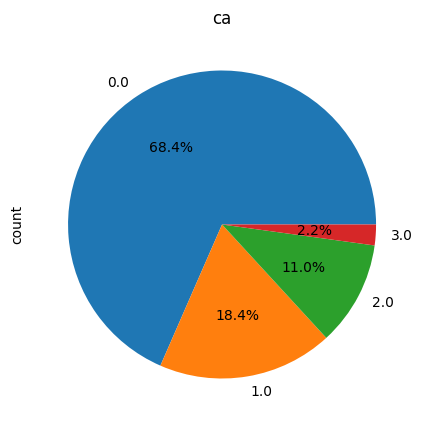

In [110]:

plt.figure(figsize=(8,5))
fig = df["ca"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ca")

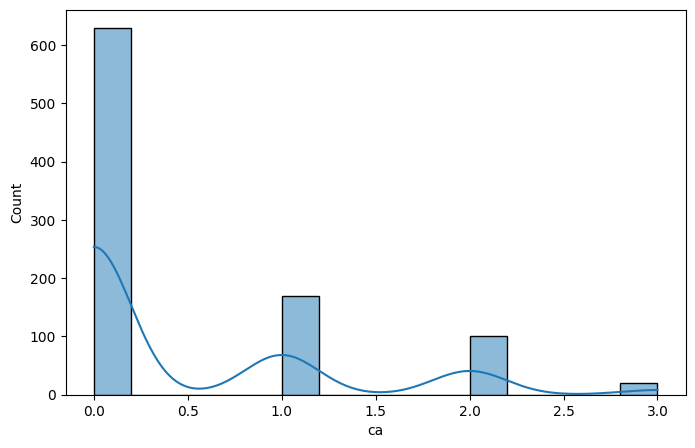

In [111]:
#ca histogram

plt.figure(figsize=(8,5))
fig = sns.histplot(df,x="ca",kde = True)

In [112]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="ca")
fig.show()

<Figure size 800x500 with 0 Axes>

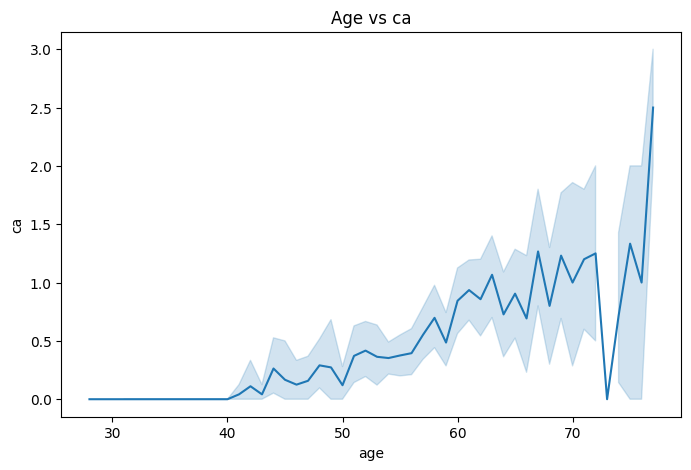

In [113]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="age",y="ca")
plt.title("Age vs ca")
plt.show()

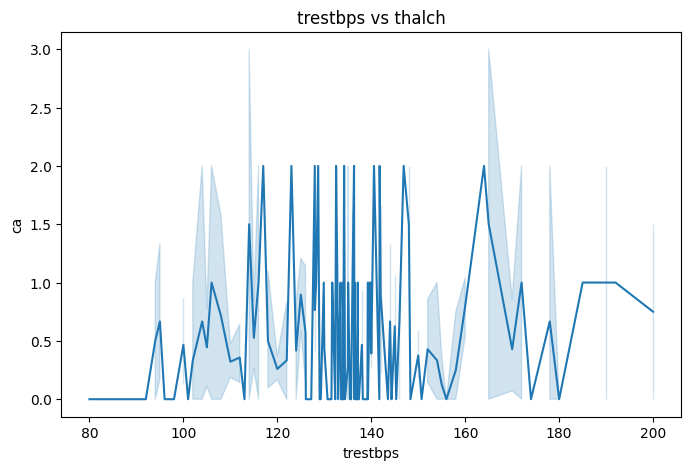

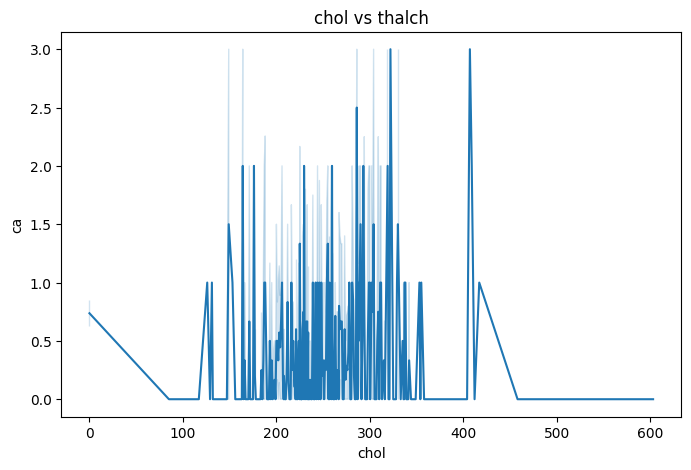

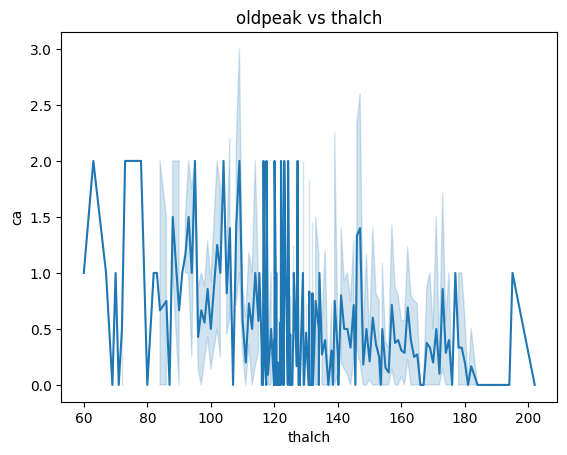

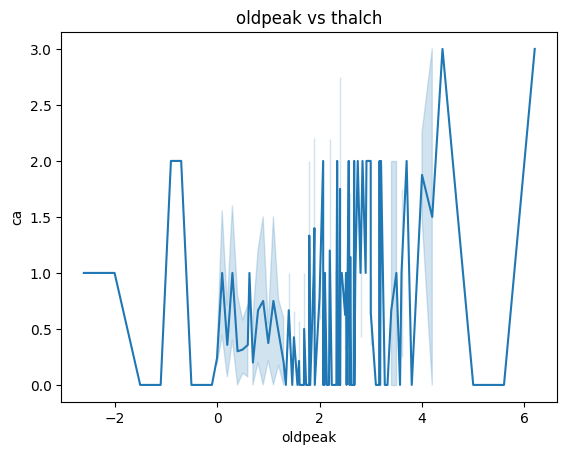

In [114]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="trestbps",y="ca")
plt.title("trestbps vs thalch")
plt.show()
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="chol",y="ca")
plt.title("chol vs thalch")
plt.show()

fig = sns.lineplot(data = df,x="thalch",y="ca")
plt.title("oldpeak vs thalch")
plt.show()

fig = sns.lineplot(data = df,x="oldpeak",y="ca")
plt.title("oldpeak vs thalch")
plt.show()

In [115]:
df.groupby("dataset")["ca"].value_counts()

dataset        ca 
Cleveland      0.0    181
               1.0     65
               2.0     38
               3.0     20
Hungary        0.0    268
               1.0     24
               2.0      1
Switzerland    1.0     49
               0.0     47
               2.0     27
VA Long Beach  0.0    133
               2.0     35
               1.0     31
Name: count, dtype: int64

Text(0.5, 1.0, 'ca and datset')

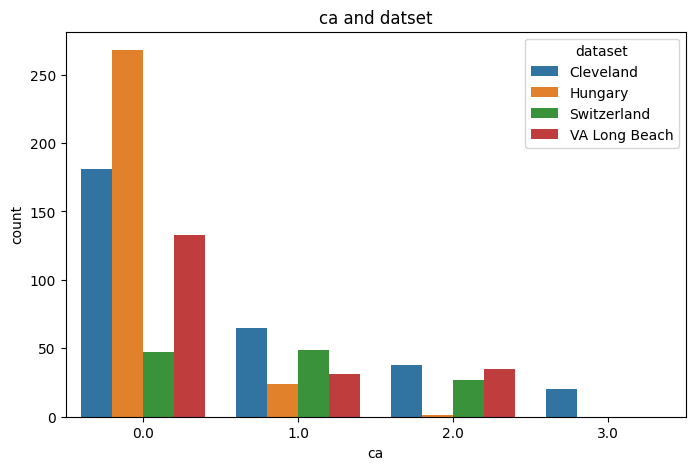

In [116]:
# make ca and datset column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="ca",hue="dataset")
plt.title("ca and datset")

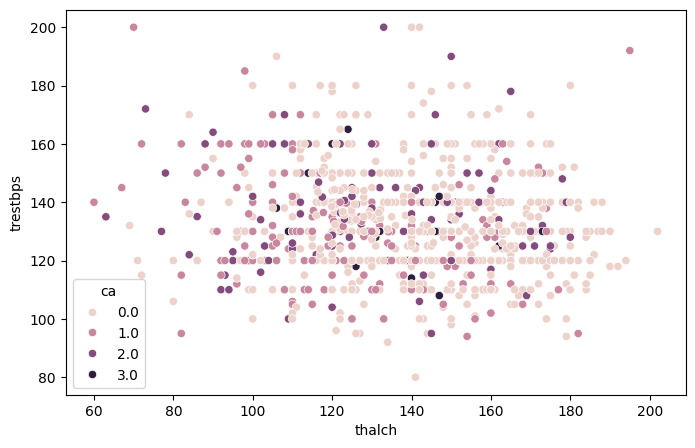

In [117]:
plt.figure(figsize=(8,5))
fig = sns.scatterplot(data = df,x="thalch",y="trestbps",hue="ca")

#### thal

In [118]:
# thal value count

df["thal"].value_counts()

thal
reversable defect    524
normal               330
fixed defect          65
Name: count, dtype: int64

Text(0.5, 1.0, 'thal types')

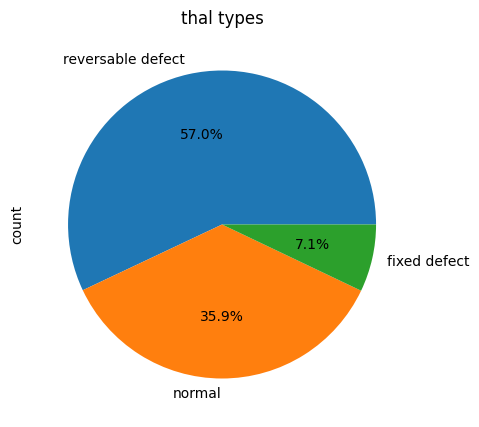

In [119]:

plt.figure(figsize=(8,5))
fig = df["thal"].value_counts().plot.pie(autopct="%1.1f%%",subplots=True)
plt.title("thal types")

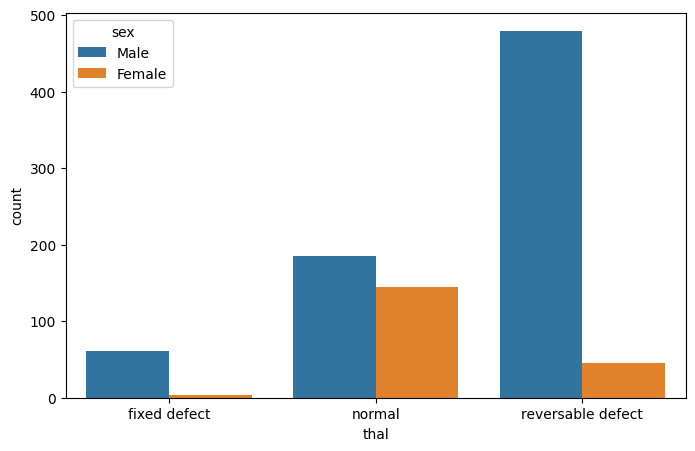

In [120]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="thal",hue="sex")

In [121]:
df.groupby("dataset")["thal"].value_counts()

dataset        thal             
Cleveland      normal               168
               reversable defect    118
               fixed defect          18
Hungary        reversable defect    147
               normal               127
               fixed defect          19
Switzerland    reversable defect     86
               normal                24
               fixed defect          13
VA Long Beach  reversable defect    173
               fixed defect          15
               normal                11
Name: count, dtype: int64

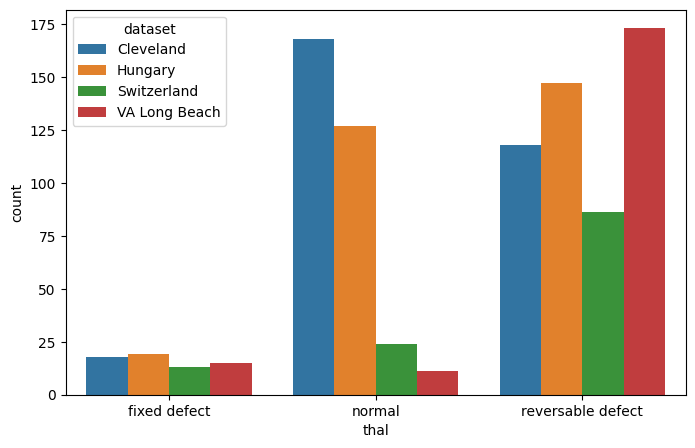

In [122]:
#draw an plot of age column grouped by cp column

plt.figure(figsize=(8,5))
fig = sns.countplot(data = df,x="thal",hue="dataset")

In [123]:
df.groupby("sex")["thal"].value_counts()

sex     thal             
Female  normal               145
        reversable defect     45
        fixed defect           4
Male    reversable defect    479
        normal               185
        fixed defect          61
Name: count, dtype: int64

Text(0.5, 1.0, '')

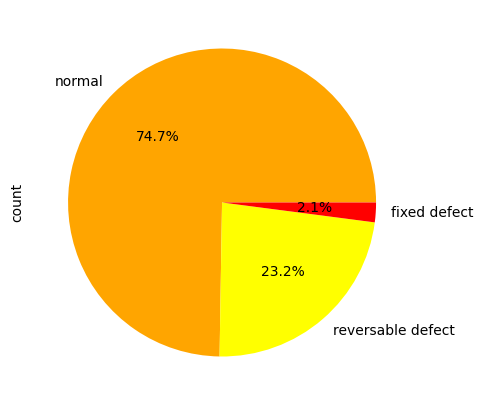

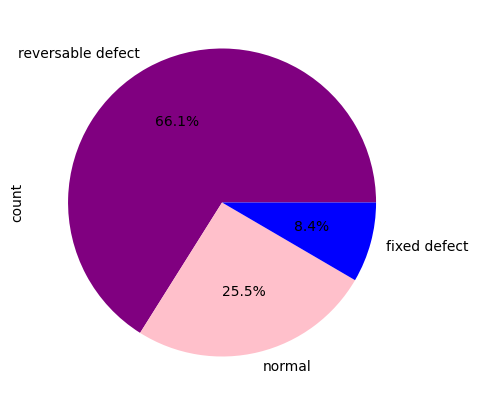

In [124]:

plt.figure(figsize=(8,5))
fig = df[df["sex"] == "Female"]["thal"].value_counts().plot.pie(autopct="%1.1f%%",colors=["orange","yellow","red"])
plt.title("")


plt.figure(figsize=(8,5))
fig = df[df["sex"] == "Male"]["thal"].value_counts().plot.pie(autopct="%1.1f%%",colors=["purple","pink",'blue'])
plt.title("")

#### num (the predicted attribute)

In [125]:
#num uniqe values

df["num"].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

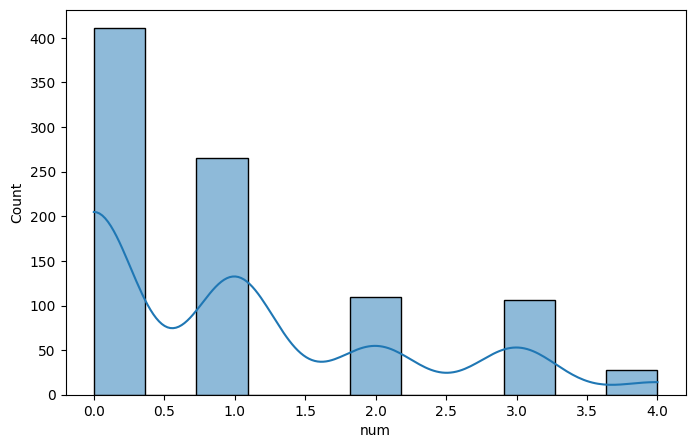

In [126]:
#oldpeak histogram

plt.figure(figsize=(8,5))
fig = sns.histplot(df,x="num",kde = True)

In [127]:

plt.figure(figsize=(8,5))
fig = px.histogram(df,x="age",color="num")
fig.show()

<Figure size 800x500 with 0 Axes>

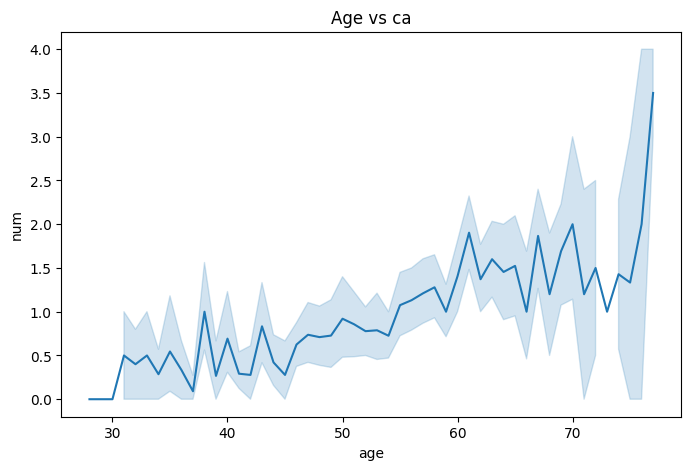

In [128]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="age",y="num")
plt.title("Age vs ca")
plt.show()

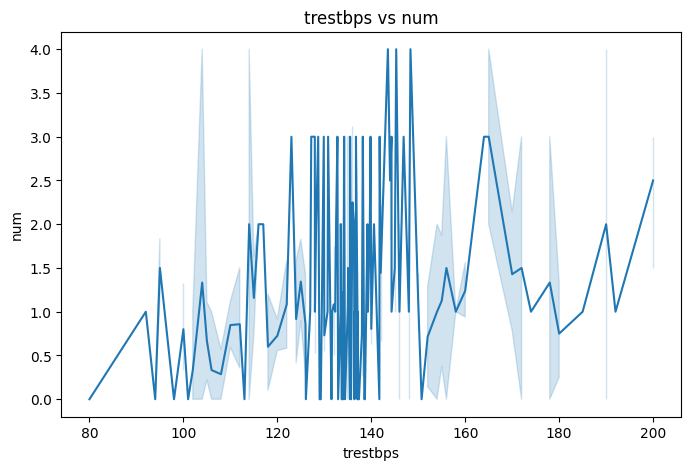

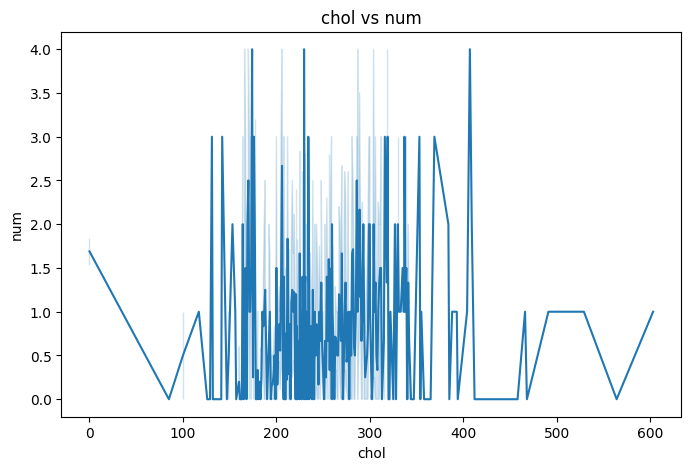

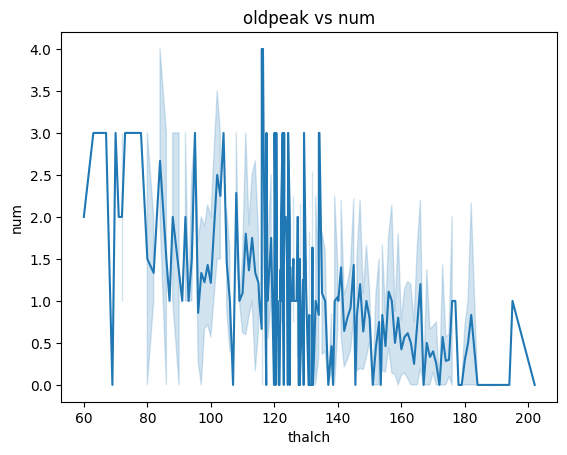

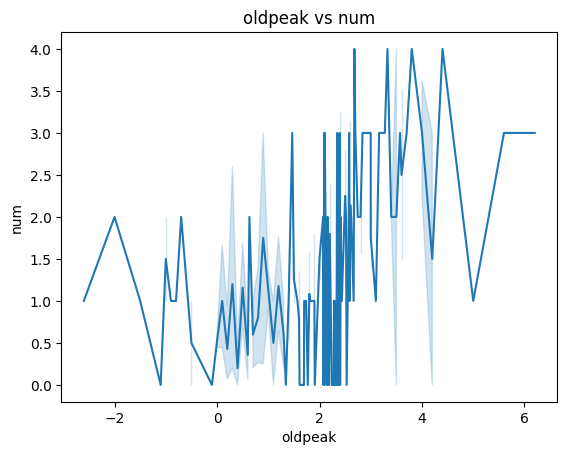

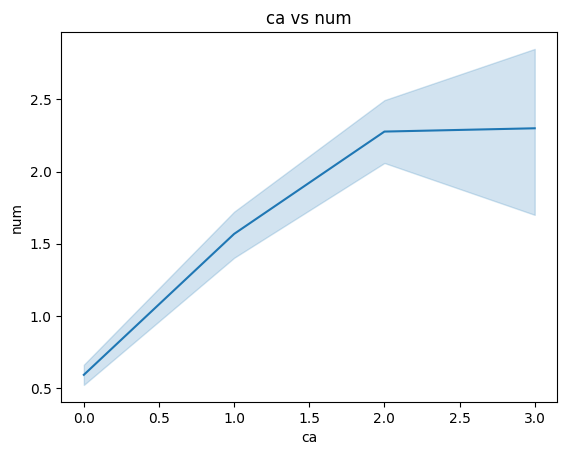

In [129]:
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="trestbps",y="num")
plt.title("trestbps vs num")
plt.show()
plt.figure(figsize=(8,5))
fig = sns.lineplot(data = df,x="chol",y="num")
plt.title("chol vs num")
plt.show()

fig = sns.lineplot(data = df,x="thalch",y="num")
plt.title("oldpeak vs num")
plt.show()

fig = sns.lineplot(data = df,x="oldpeak",y="num")
plt.title("oldpeak vs num")
plt.show()

fig = sns.lineplot(data = df,x="ca",y="num")
plt.title("ca vs num")
plt.show()

In [130]:
df.head(1)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0


-----------------------------

# **mechine learning**

In [131]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [132]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

- 0 = no heart disease
- 1 = mild heart disease
- 2 = moderate heart disease 
- 3 = severe heart disease
- 4 = critical heart disease

In [142]:
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

# label_encoder = LabelEncoder()
# 
# for col in X.columns:
#     if X[col].dtype == 'object' or X[col].dtype == 'category':
#         X[col] = label_encoder.fit_transform(X[col])
#     else:
#         pass

# Separate label encoders for each categorical column
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

- 1. logistic regression
- 2. KNN
- 3. NB
- 4. SVM
- 5. Decision Tree
- 6. Random Forest
- 7. XGBoost
- 8. GradientBoosting
- 9. AdaBoost
- 10. lightGBM

In [134]:
#import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# import pipeline
from sklearn.pipeline import Pipeline

# import matrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [147]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel

# Prepare data
X = df.drop('num', axis=1)
y = df['num']

label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Ada Boost', AdaBoostClassifier(random_state=42))
]

# Impute and scale data
imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Hyperparameter tuning for Random Forest
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

# Voting Classifier for ensemble methods
ensemble_model = VotingClassifier(estimators=models, voting='hard')
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('model', ensemble_model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))

# Feature selection with RandomForest
selector = SelectFromModel(RandomForestClassifier(random_state=42))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train_selected, y_train)
y_pred = pipeline.predict(X_test_selected)
print("Feature Selected Model Accuracy:", accuracy_score(y_test, y_pred))


Best Random Forest Accuracy: 0.6485507246376812
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Ensemble Model Accuracy: 0.6086956521739131
Feature Selected Model Accuracy: 0.6630434782608695


In [140]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Ada Boost', AdaBoostClassifier(random_state=42))
    
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy='most_frequent')),
        #('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6563105620155039
Test Accuracy: 0.644927536231884

Model: Gradient Boosting
Cross-validation Accuracy: 0.640734011627907
Test Accuracy: 0.6485507246376812

Model: Support Vector Machine
Cross-validation Accuracy: 0.5754481589147287
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5100290697674419
Test Accuracy: 0.5036231884057971

Model: XGBoost
Cross-validation Accuracy: 0.6422965116279069
Test Accuracy: 0.6304347826086957

Model: Naive Bayes
Cross-validation Accuracy: 0.5786216085271317
Test Accuracy: 0.5579710144927537

Model: Decision Tree
Cross-validation Accuracy: 0.6018047480620154
Test Accuracy: 0.6123188405797102

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5738856589147286
Test Accuracy: 0.605072463768116

Model: Ada Boost
Cross-validation Accuracy: 0.5848110465116279
Test Accuracy: 0.5615942028985508

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_

----------------------------------------------

#### **Output :**
- 1 minimum age to get heart attack is 27 years
- most people get heart disease at 53 years
- Both male and female have highest heart disease rate at age 53-54
- male percentage in data :  78.913043
- female percentage in data : 21.086957
- males are : 274.23 % more then females
- number and percentage of people according to dataset is as follow
  - Cleveland        304    33.1%
  - Hungary          293    33.9%
  - VA Long Beach    199    21.7%
  - Switzerland      123    13.4%
- we have highest number opf people from Cleveland 304 andf lowest from Switzerland 123
- highest number of females are from Cleveland (97) and lowest numkber of females are from VA long beach (6)
- highest number of males are from Humgary (212) and lowest numkber of males are from Switzerland (113)
- the observation here about  mean, median and mode of age column, grouped by dataset column

  -  mean of dataset  Cleveland        54.351974
  -  mean of dataset  Hungary          47.894198
  -  mean of dataset  Switzerland      55.317073
  -  mean of dataset  VA Long Beach    59.350000
  -  ---------------------------------
  -  median of dataset Cleveland        55.5
  -  median of dataset Hungary          49.0
  -  median of dataset Switzerland      56.0
  -  median of dataset VA Long Beach    60.0
  -  ---------------------------------
  -  mode of dataset  Cleveland              58
  -  mode of dataset  Hungary                54
  -  mode of dataset  Switzerland            61
  -  mode of dataset  VA Long Beach    [62, 63] 
- distribution of chest pain(cp) is as follow
  - 54% have asymptomatic
  - 22.1% have non-anginal
  - 18.9% have a-typical angina
  - 5% have typical angina 
- highest chest pain(cp) type in men is asymptomatic(426) and lowest chest pain(cp) type in men is typical angina(36)
- highest chest pain(cp) type in female is asymptomatic(70) and lowest chest pain(cp) type in female is typical angina(10)
- 
- highest chest pain(cp) type most commonly happing in which age group

  - 51.61% of a-symptomatic pateints are betwee the age group of 54-63 years
  - 34.48% of non angina pateints are betwee the age group 50-59 years
  - 32.18% of a-typical pateints are betwee the age group 52-57 years
  - 21.73% of typical angina pateints are betwee the age group 62-65 years
  - 
- write down the observation here about cp(chest pain) according to countries      
  - people with asymptomatic Chest pain in Cleveland : 144
  - people with asymptomatic Chest pain in VA Long Beach : 131
  - people with asymptomatic Chest pain in Hungary : 123
  - people with asymptomatic Chest pain in Switzerland : 98
  - ------------------------------------------------------
  - people with atypical angina Chest pain in Hungary : 105
  - people with atypical angina Chest pain in Cleveland : 51
  - people with atypical angina Chest pain in VA Long Beach : 14
  - people with atypical angina Chest pain in Switzerland : 4
  - ------------------------------------------------------
  - people with non-anginal Chest pain in Cleveland : 86
  - people with non-anginal Chest pain in Hungary : 54
  - people with non-anginal Chest pain in VA Long Beach : 47
  - people with non-anginal Chest pain in Switzerland : 17
  - ------------------------------------------------------
  - people with typical angina Chest pain in Cleveland : 23
  - people with typical angina Chest pain in Hungary : 11
  - people with typical angina Chest pain in VA Long Beach : 8
  - people with typical angina Chest pain in Switzerland : 4
- highest chest pain(cp) type in men is asymptomatic(426) and lowest chest pain(cp) type in men is typical angina(36)
- highest chest pain(cp) type in female is asymptomatic(70) and lowest chest pain(cp) type in female is typical angina(10) 

- age factor dosent much effect peoples cholostrol level
- 47.6 % of pataints have chol level 190-260 and 18.6 % of pataints have chol level less then 40
  - 56 % of male pataints have chol level 190-290 and 22.0 % of male pataints have chol level less then 40
  - 52.57 % of female pataints have chol level 190-270 and 5.670 % of female pataints have chol level less then 40
- 
- the 15 % people have fasting blood sugar > 120 mg/dl and the 85% people have fasting blood sugar < 120 mg/dl
  - the 9.8 % males have fasting blood sugar > 120 mg/dl and the 90.2% people have fasting blood sugar < 120 mg/dl
  - the 16.4 % males have fasting blood sugar > 120 mg/dl and the 86.6% people have fasting blood sugar < 120 mg/dl
  - 
- most common resting bps is 120 to 140 
- it has been seen increase in trestbps (resting blood pressure) with increse in age
- it is seen a pattren in majority of petaints whose resting blood presssure is between 110-170 their serum cholestrol is 150-350 
- 
- peoples resting electrocardiographic results are as follow
  - 551(60%) peoples are normal              
  - 189(20.5%) peoples are lv hypertrophy      
  - 179(19.5%) peoples are st-t abnormality
- highest resting electrocardiographic results type in men is normal(432) and lowest electrocardiographic results type in men is lv hypertrophy(142)
- highest resting electrocardiographic results type in female is normal(119) and lowest resting electrocardiographic results type in female is st-t abnormality(28)
- resteg type is highest or lowest according dataset
  - resteg type lv-hypertrophy is highest from Cleveland(149)
  - resteg type lv-hypertrophy is lowest from Hungary(6)
  - resteg type normal is highest from Cleveland(235)
  - resteg type normal is lowest from VA Hungary(79)
  - resteg type st-t abnormality is highest from VA Long Beach(93)
  - resteg type st-t abnormality is lowest Cleveland(4)
  - 
- 50.% (461) people have talch column maximum heart rate between 117-153
- its observerd that talch column (maximum heart rate) decrease with incresae in age 
- the average talch column (maximum heart rate) from each country according to data is 
  - average talch column (maximum heart rate) from Cleveland  is 149.72
  - average talch column (maximum heart rate) from Hungary  is  138.99
  - average talch column (maximum heart rate) from Switzerland is 121.56
  - average talch column (maximum heart rate) from VA Long Beach is 123.14
  - 
-41% (378) have exercise-induced angina(exang)column
-59%(541) dont have exercise-induced angina(exang)column
  - 22% men have exercise-induced angina(exang)column
  - 78% men dont have exercise-induced angina(exang)column
  - 54% women have exercise-induced angina(exang)column
  - 46% women dont have exercise-induced angina(exang)column
- exercise-induced angina(exang)column according dataset
  - Cleveland(149) have higher people with exercise-induced angina 
  - Hungary have higher people with exercise-induced angina 
  - Switzerland have same ratio of people with and without exercise-induced angina 
  - VA Long Beach have higher people without exercise-induced angina 
- the average talch column (maximum heart rate) from exercise-induced angina
  - average talch (maximum heart rate) of people without exercise-induced angina is 144.43
  - average talch (maximum heart rate) people with exercise-induced angina  is  125.81

- 40% of people oldpeak value is 0
- the values of oldpeak increase with increase in age going fromn 0 to 2.5
- the values of old peak increased relitively increase at when talch (maximum heart rate) was 115-130
- avg oldpeak values according to dataset are
  - Cleveland        1.0
  - Hungary          0.5
  - Switzerland      0.6
  - VA Long Beach    1.5
  
- for most people the slope of the peak exercise ST segment is flat slope(545)
- for some people the slope of the peak exercise ST segment is upsloping (294)
- for least people the slope of the peak exercise ST segment is flat slope(80)
- value of slope according to dataset
  - from Cleveland most people the slope of the peak exercise ST segment is upsloping(143)
  - from Cleveland least people the slope of the peak exercise ST segment downsloping( 21)
  - from Hungary most people the slope of the peak exercise ST is segmentflat (191)
  - from Hungary least people the slope of the peak exercise ST is downsloping (1)
  - from Switzerland most people the slope of the peak exercise ST segmentflat ( 78)
  - 
  - from Switzerland least people the slope of the peak exercise ST is downsloping( 12)
  - from VA Long Beach most people the slope of the peak exercise ST segment flat (136)
  - from VA Long Beach least people the slope of the peak exercise ST is upsloping( 17)

- the value of ca are according to data is
  - 634(59%) people have value of ca 0.0 
  - 160(17.4%) people have value of ca 1.0 
  - 105(11.4%) people have value of ca 2.0 
  - 20(2.2%) people have value of ca 3.0 
- it is observed that value of ca increase with increase in age from 40 onwards
- value of ca according to dataset
  - Cleveland have most common ca value : 0.0 
  - Cleveland have most least common ca value :3.0 
  - Hungary have most common ca value : 0.0  
  - Hungary dont have any people with ca value : 2.0 and 3.0    
  - Switzerland have most common ca value : 0.0  
  - Switzerland dont have any people with ca value :3.0 
  - VA Long Beach have most common ca value : 0.0  
  - VA Long Beach dont have any people with ca value : 3.0
  - 510 (55.5%) got thal type reversable defect    
  - 347(37.8%) got thal type normal
- thal distribution in man and female               
  - 62(6.7%) got thal type fixed defect     
  - 155 ( 80%) Female got thal type normal              
  - 35( 18%) Female got thal type reversable defect 
  - ------------------------------------------------ 
  - 4( 2%) Male got thal type fixed defect        
  - 475( 65 %) Male got thal type reversable defect   
  - 192( 27 %) Male got thal type normal              
  - 58( 8 %) Male got thal type fixed defect 
- thal distribution according to dataset
  - Cleveland 168 are normal             
  - Cleveland 118 are reversable defect  
  - Cleveland  18 are fixed defect      
  - ------------------------------------------------   
  - Hungary 143 are normal             
  - Hungary 130 are reversable defect  
  - Hungary 20 are fixed defect        
  - ------------------------------------------------ 
  - Switzerland 83 are reversable defect  
  - Switzerland 29 are normal             
  - Switzerland 11 are fixed defect       
  - ------------------------------------------------  
  - VA Long Beach 179 are reversable defect  
  - VA Long Beach 13 are fixed defect       
  - VA Long Beach 7 are normal    

- the value of num (the predicted attribute) is 0 for 411 people
- the value of num (the predicted attribute) is 1 for 265 people
- the value of num (the predicted attribute) is 2 for 109 people
- the value of num (the predicted attribute) is 3 for 106 people
- the value of num (the predicted attribute) is 4 for 28 people
- it is obsereved that value of num increase with increase in age
- it is obsereved that value of num increase with increase in value of ca